In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.utils import get_device
import matplotlib.pyplot as plt
import torch
from src.dataset import get_one_magnet, ChiMode
import numpy as np
from src.train import calculate_metrics, calculate_metrics_baseline
from src.plotting import plot_heatmaps_amplitude

In [3]:
from src.model import Network, torch

model = Network(in_features=6, hidden_dim_factor=12, out_features=3)
weights_path = "../results/2024-11-11 15:56:52.417714/weights.pt"
model.load_state_dict(torch.load(weights_path, weights_only=True))

<All keys matched successfully>

In [4]:
def get_amp_heatmap(model, save_path, epoch):
    X, B = get_one_magnet(
        chi_mode=ChiMode.ISOTROPIC,
        data=np.load("../data/isotropic_chi/eval/data_1.npz"),
    )

    grid = X[:, 3:]
    a = float(X[0, 0])
    b = float(X[0, 1])
    chi = float(X[0, 2])

    with torch.no_grad():
        B_pred = model(torch.tensor(X))

    _, amplitude_errors_baseline = calculate_metrics_baseline(
        B=B,
        return_abs=False,
    )
    _, amplitude_errors_trained = calculate_metrics(
        B=torch.tensor(B),
        B_pred=B_pred,
        return_abs=False,
    )

    plot_heatmaps_amplitude(
        grid=grid,
        amplitude_errors_baseline=amplitude_errors_baseline,
        amplitude_errors_trained=amplitude_errors_trained,
        a=a,
        b=b,
        chi=chi,
        epoch=epoch,
        save_path=save_path,
    )

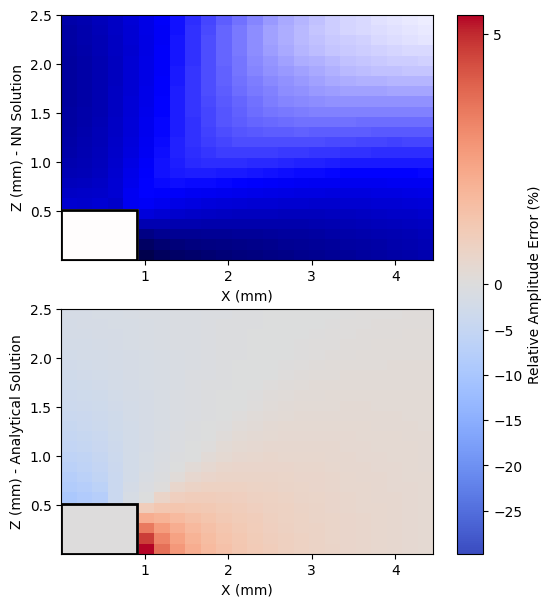

In [5]:
get_amp_heatmap(model=model, save_path=None, epoch="done")